In [53]:
'''
Done By A S V DHANUSH 
CS20B1057 IIITDM KANCHEEPURAM
Important libraries
'''
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [54]:

'''
1. Calculate the distance between the two normalized histograms H1 and H2 using each of the following methods:
(a) KL Distance
(b) Bhattacharyya Distance

H1 = [ 0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.12, 0.04]
H2 = [ 0.22, 0.23, 0.16, 0.13, 0.11, 0.08, 0.05, 0.02]

'''
'''
a)For calculatig the KL (Kullback Leibler) distance or KL Divergence
D_KL(P,Q) = sigma_1_d(P_i*ln(P_i/Q_i))


'''
H_1 = [ 0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.12, 0.04]
#similar to X = [x1,x2,.....,xd]
H_2 = [ 0.22, 0.23, 0.16, 0.13, 0.11, 0.08, 0.05, 0.02]
Bkl_X_Y = 0

values = []
for i in range(0,len(H_1)):
    values.append(H_1[i]*(math.log(H_1[i]/H_2[i])))
    Bkl_X_Y = Bkl_X_Y + (H_1[i]*(math.log(H_1[i]/H_2[i])))
print(values)
print(f"\nKL (Kullback Leibler) distance or KL Divergence : {Bkl_X_Y}")


[0.020882730477511123, -0.027952388475031748, 0.0, -0.00960512492082438, -0.025476298489482768, -0.027725887222397813, 0.10505624848246797, 0.027725887222397813]

KL (Kullback Leibler) distance or KL Divergence : 0.06290516707464021


In [55]:
'''
b)For calculating the Bhattacharyya Distance
THE FORMULA USED  IS : B(X,Y) = sigma_1_to_n(sqrt(xi*yi)) => D_B(X,Y) = -ln(B(X,Y))

'''
H_1 = [ 0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.12, 0.04]
H_2 = [ 0.22, 0.23, 0.16, 0.13, 0.11, 0.08, 0.05, 0.02]
def bhattacharyya_distance(hist1, hist2):
    hist1 = np.array(hist1)
    hist2 = np.array(hist2)
    return -np.log(np.sum(np.sqrt(hist1 * hist2)))

print(f"Bhattacharyya Distance : {bhattacharyya_distance(H_1,H_2)}")

Bhattacharyya Distance : 0.014830056106628986


In [56]:
'''
2. Given (hq − ht)^T find 

(hq-ht)^T = [0.5 0.5 -0.5 -0.25 -0.25] (MATRIX TRANSPOSE)

=> (hq-ht) = [0.5         (MATRIX)
              0.5
             -0.5
             -0.25
             -0.25]
             
             AND
             
A = [1 0.135 0.195 0.137 0.157
    0.135 1 0.2 0.309 0.143
    0.195 0.2 1 0.157 0.122
    0.137 0.309 0.157 1 0.195
    0.157 0.143 0.122 0.195 1]
    
    FIND QUADRATIC FORM 
    
    
'''
#let us give hq-ht a variable as h_net

h_net_transpose = np.array([0.5,0.5,-0.5,-0.25,-0.25])
A = np.array([[1,0.135,0.195,0.137, 0.157],[0.135,1, 0.2 ,0.309 ,0.143],[0.195 ,0.2, 1, 0.157, 0.122],[0.137,0.309,0.157 ,1,0.195],[0.157,0.143,0.122,0.195,1]])
h_net = np.transpose(h_net_transpose)
# print(h_net)
# print(h_net_transpose)
# print(A)

result = h_net_transpose @ A @ h_net
print(result)

quadratic_form_distance = math.sqrt(result)

print(f"Quadratic Form Distance : {quadratic_form_distance}")

0.6526249999999999
Quadratic Form Distance : 0.8078520904224981


In [57]:
'''
3. Compare two text files doc1.txt and doc2.txt using cosine distance.
doc1.txt
MATLAB is a program for solving engineering and mathematical problems. The basic MATLAB objects are
vectors and matrices, so you must be familiar with these before making extensive use of this program.
doc2.txt
'''

with open('doc1.txt', 'r') as f:
  document1 = f.read()
  
with open('doc2.txt', 'r') as f:
  document2 = f.read()
  
#Opening the text files

def cosine_distance(doc1,doc2):
    # converting the documents to lower case
    doc1 = doc1.lower()
    doc2 = doc2.lower()
    # removing the punctuations
    punct = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in doc1:
        if x in punct:
            doc1 = doc1.replace(x,"")
    for x in doc2:
        if x in punct:
            doc2 = doc2.replace(x,"")
    # converting the documents to lists
    doc1 = doc1.split()
    doc2 = doc2.split()
    # finding the unique words in the documents
    unq_words = list(set(doc1+doc2))
    # creating the vectors for the documents
    doc1_v = np.zeros(len(unq_words))
    doc2_v = np.zeros(len(unq_words))
    # filling the vectors with the word counts
    for i in range(len(unq_words)):
        doc1_v[i] = doc1.count(unq_words[i])
        doc2_v[i] = doc2.count(unq_words[i])
    return 1-np.dot(doc1_v,doc2_v)/(np.linalg.norm(doc1_v)*np.linalg.norm(doc2_v)) #cosine ditance formule
print("The cosine distance :",cosine_distance(document1,document2))


The cosine distance : 0.7136718566608999


In [58]:
'''
4. Classify flower 1, 51, and 101 from the Iris irisset (.csv file) attached along with the assignment document
into one of the three classes as given in irisset specification:

Directions to classify:
1. Use features PetalLengthCm and PetalWidthCm only for classification.
2. Consider flowers 1,51 and 101 as test cases.
3. Plot the distribution of rest 147 sample points along with their classes( differentiate classes with different
colour). Consider PetalWidthCm along Y-axis and PetalLengthCm along X-axis.
4. Capture the properties of the distribution and use suitable distance metrics to classify the flowers 1,51 and
101 into one of the classes.
5. Print their class and plot the points on the previous plot with a marker differentiating the three points

'''


iris = pd.read_csv("Iris.csv.csv")
#print(iris)

#dropping the  "Id","SepalLengthCm","SepalWidthCm" columns as they are unnecessary
iris = iris.drop(["Id","SepalLengthCm","SepalWidthCm"],axis =1)
print(iris)

#Now taking the 1st,51st and 101th and dropping them from the irisset
iris_test1 = iris.iloc[0]
iris_test51 = iris.iloc[50]
iris_test101 = iris.iloc[100]

#dropppig these cases to get the training iris
iris_train = iris.drop([0,50,100],axis=0)
print(iris_train)


     PetalLengthCm  PetalWidthCm         Species
0              1.4           0.2     Iris-setosa
1              1.4           0.2     Iris-setosa
2              1.3           0.2     Iris-setosa
3              1.5           0.2     Iris-setosa
4              1.4           0.2     Iris-setosa
..             ...           ...             ...
145            5.2           2.3  Iris-virginica
146            5.0           1.9  Iris-virginica
147            5.2           2.0  Iris-virginica
148            5.4           2.3  Iris-virginica
149            5.1           1.8  Iris-virginica

[150 rows x 3 columns]
     PetalLengthCm  PetalWidthCm         Species
1              1.4           0.2     Iris-setosa
2              1.3           0.2     Iris-setosa
3              1.5           0.2     Iris-setosa
4              1.4           0.2     Iris-setosa
5              1.7           0.4     Iris-setosa
..             ...           ...             ...
145            5.2           2.3  Iris-virgin

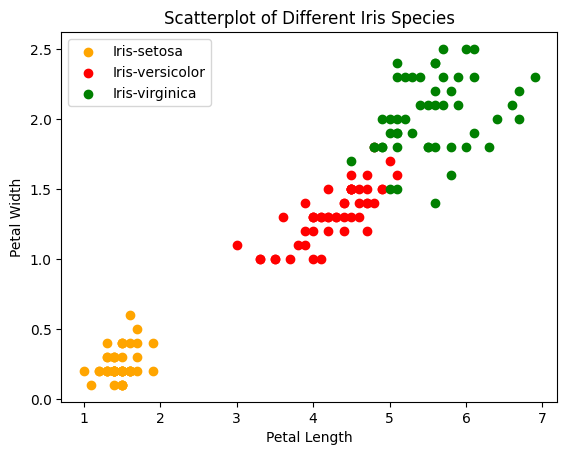

In [59]:
# plotting the Iris Species
plt.scatter(iris[iris["Species"]=="Iris-setosa"]["PetalLengthCm"],iris[iris["Species"]=="Iris-setosa"]["PetalWidthCm"],color="orange")
plt.scatter(iris[iris["Species"]=="Iris-versicolor"]["PetalLengthCm"],iris[iris["Species"]=="Iris-versicolor"]["PetalWidthCm"],color="red")
plt.scatter(iris[iris["Species"]=="Iris-virginica"]["PetalLengthCm"],iris[iris["Species"]=="Iris-virginica"]["PetalWidthCm"],color="green")
# labelling the legend
plt.legend(["Iris-setosa","Iris-versicolor","Iris-virginica"])

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.title("Scatterplot of Different Iris Species")
# displaying the plot
plt.show()

In [60]:
#Creating three classes and differentiating the species
class_setosa = iris[iris["Species"]=="Iris-setosa"]
class_versicolor = iris[iris["Species"]=="Iris-versicolor"]
class_virginica = iris[iris["Species"]=="Iris-virginica"]
#and dropping the species column
class_setosa = class_setosa.drop(["Species"],axis=1)
class_versicolor = class_versicolor.drop(["Species"],axis=1)
class_virginica = class_virginica.drop(["Species"],axis=1)

#dropping the flowers 1,51 and 101

flower1 = iris_test1["Species"]
flower51 = iris_test51["Species"]
flower101= iris_test101["Species"]
iris_test1 = iris_test1.drop(["Species"])
iris_test51 = iris_test51.drop(["Species"])
iris_test101 = iris_test101.drop(["Species"])
print("The Species of flower 1 (Test) is",flower1)
print("The Species of flower 51 (Test)is",flower51)
print("The Species of flower 101 is",flower101)



The Species of flower 1 (Test) is Iris-setosa
The Species of flower 51 (Test)is Iris-versicolor
The Species of flower 101 is Iris-virginica


In [61]:
#Using Mahalanobis Distance
#func for calculating Mahalanobis Distance
def mahalanobis(x, mean, cov):
    x_minus_mean = x - mean
    inv_cov = np.linalg.inv(cov)
    return np.sqrt(np.dot(np.dot(x_minus_mean, inv_cov), x_minus_mean))


#calculating the distances

iris_test1_mahalanobis = np.array([mahalanobis(np.array(iris_test1[0:]),class_setosa[["PetalLengthCm","PetalWidthCm"]].mean().values,class_setosa[["PetalLengthCm","PetalWidthCm"]].cov().values),mahalanobis(iris_test1[0:],class_versicolor[["PetalLengthCm","PetalWidthCm"]].mean().values,class_versicolor[["PetalLengthCm","PetalWidthCm"]].cov().values),mahalanobis(iris_test1[0:],class_virginica[["PetalLengthCm","PetalWidthCm"]].mean().values,class_virginica[["PetalLengthCm","PetalWidthCm"]].cov().values)])
iris_test51_mahalanobis = np.array([mahalanobis(np.array(iris_test51[0:]),class_setosa[["PetalLengthCm","PetalWidthCm"]].mean().values,class_setosa[["PetalLengthCm","PetalWidthCm"]].cov().values),mahalanobis(iris_test51[0:],class_versicolor[["PetalLengthCm","PetalWidthCm"]].mean().values,class_versicolor[["PetalLengthCm","PetalWidthCm"]].cov().values),mahalanobis(iris_test51[0:],class_virginica[["PetalLengthCm","PetalWidthCm"]].mean().values,class_virginica[["PetalLengthCm","PetalWidthCm"]].cov().values)])
iris_test101_mahalanobis = np.array([mahalanobis(np.array(iris_test101[0:]),class_setosa[["PetalLengthCm","PetalWidthCm"]].mean().values,class_setosa[["PetalLengthCm","PetalWidthCm"]].cov().values),mahalanobis(iris_test101[0:],class_versicolor[["PetalLengthCm","PetalWidthCm"]].mean().values,class_versicolor[["PetalLengthCm","PetalWidthCm"]].cov().values),mahalanobis(iris_test101[0:],class_virginica[["PetalLengthCm","PetalWidthCm"]].mean().values,class_virginica[["PetalLengthCm","PetalWidthCm"]].cov().values)])

print("The Mahalanobis distance mean of each class and flower-1 (test case 1) : ",iris_test1_mahalanobis)
print("The Mahalanobis distance mean of each class and flower-51 (test case 51) : ",iris_test51_mahalanobis)
print("The Mahalanobis distance mean of each class and flower-101(test case 101) : ",iris_test101_mahalanobis)



The Mahalanobis distance mean of each class and flower-1 (test case 1) :  [0.48339992 6.26072334 8.74739875]
The Mahalanobis distance mean of each class and flower-51 (test case 51) :  [19.39566745  1.10512309  2.43441587]
The Mahalanobis distance mean of each class and flower-101(test case 101) :  [29.51164647  6.14001637  1.74686339]


In [62]:
#Giving class labels to the test test cases based on least distance
test1_class = np.argmin(iris_test1_mahalanobis)
test51_class = np.argmin(iris_test51_mahalanobis)
test101_class = np.argmin(iris_test101_mahalanobis)

print("Flower-1 belongs to class : ",test1_class)
print("Flower-51 belongs to class : ",test51_class)
print("Flower-101 belongs to class : ",test101_class)

Flower-1 belongs to class :  0
Flower-51 belongs to class :  1
Flower-101 belongs to class :  2


The species of flower 1 is Iris-setosa
The species of flower 51 is Iris-versicolor
The species of flower 101 is Iris-virginica


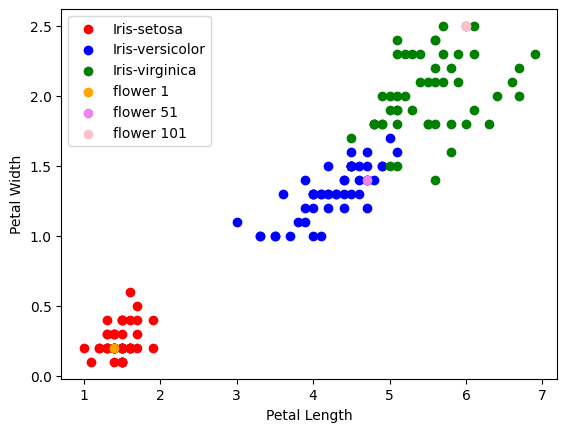

In [63]:
if test1_class== 0:
    test1_class = "Iris-setosa"
if test51_class == 1:
    test51_class = "Iris-versicolor"
if test101_class == 2:
    test101_class = "Iris-virginica"
    
#printing the species of the testcases
# printing the species of the test cases
print("The species of flower 1 is",test1_class)
print("The species of flower 51 is",test51_class)
print("The species of flower 101 is",test101_class)

# displaying the graph of dataset with the test cases
plt.scatter(class_setosa["PetalLengthCm"],class_setosa["PetalWidthCm"],color="red",label="Iris-setosa")
plt.scatter(class_versicolor["PetalLengthCm"],class_versicolor["PetalWidthCm"],color="blue",label="Iris-versicolor")
plt.scatter(class_virginica["PetalLengthCm"],class_virginica["PetalWidthCm"],color="green",label="Iris-virginica")
plt.scatter(iris_test1["PetalLengthCm"],iris_test1["PetalWidthCm"],color="orange",label="flower 1")
plt.scatter(iris_test51["PetalLengthCm"],iris_test51["PetalWidthCm"],color="violet",label="flower 51")
plt.scatter(iris_test101["PetalLengthCm"],iris_test101["PetalWidthCm"],color="pink",label="flower 101")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 4, 6, 3, 5, 2, 5, 7, 11, 13, 11, 10, 13, 21, 27, 28, 29, 30, 29, 32, 31, 25, 36, 35, 26, 36, 34, 28, 28, 26, 32, 31, 29, 26, 21, 27, 20, 19, 25, 26, 26, 23, 20, 30, 41, 33, 27, 31, 49, 45, 57, 61, 45, 63, 60, 60, 70, 56, 64, 71, 65, 62, 88, 75, 82, 77, 101, 93, 95, 84, 106, 112, 93, 105, 108, 105, 131, 127, 114, 147, 122, 132, 148, 116, 145, 143, 128, 135, 144, 133, 146, 155, 129, 135, 137, 165, 142, 169, 150, 174, 166, 159, 170, 156, 158, 213, 187, 209, 192, 181, 220, 204, 225, 206, 228, 208, 205, 179, 209, 171, 208, 167, 185, 149, 185, 160, 164, 139, 165, 163, 165, 126, 152, 145, 133, 148, 143, 145, 147, 139, 142, 171, 143, 146, 154, 132, 141, 167, 182, 208, 210, 235, 345, 296, 384, 376, 326, 299, 306, 335, 277, 222, 204, 181, 175, 172, 178, 189, 186, 175, 180, 154, 157, 141, 176, 169, 154, 143, 129, 126, 130, 113, 137, 127, 144, 173, 172, 178, 151, 170, 157, 167, 155, 182, 177, 147, 169, 17

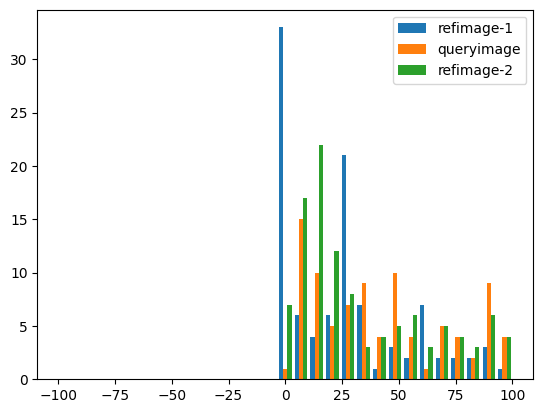

In [64]:
'''
5 . Consider the following images. Obtain the histograms for each of the images. Using a suitable distance mea-
sure, find the distance between the query image and reference images.
'''

from PIL import Image
import matplotlib.pyplot as plt
import cv2
image1 = Image.open("refimage1.png")
image2 = Image.open("queryimage.png")
image3 = Image.open("refimage2.png")

image1 = image1.convert("L")
image2 = image2.convert("L")
image3 = image3.convert("L")

histogram1 = image1.histogram()
histogram2 = image2.histogram()
histogram3 = image3.histogram()

print(histogram1)
print("-----------------------------")
print(histogram2)
print("-----------------------------")
print(histogram3)



bins = np.linspace(-100, 100, 30)

plt.hist([histogram1, histogram2,histogram3], bins, label=['refimage-1','queryimage', 'refimage-2'])
plt.legend(loc='upper right')
plt.show()



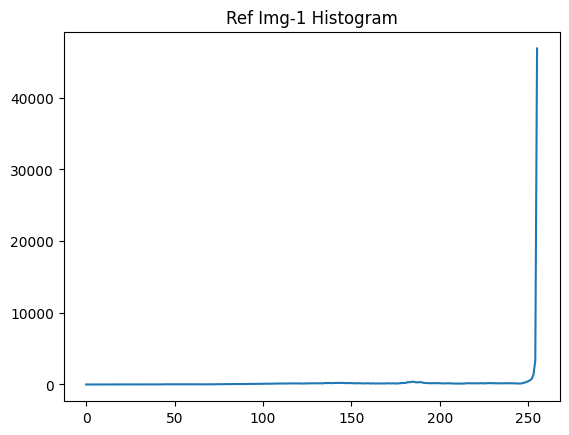

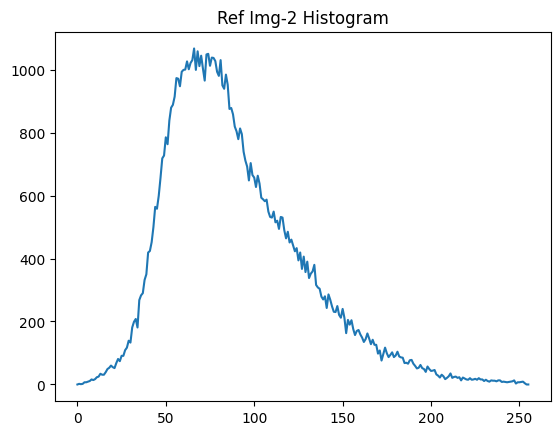

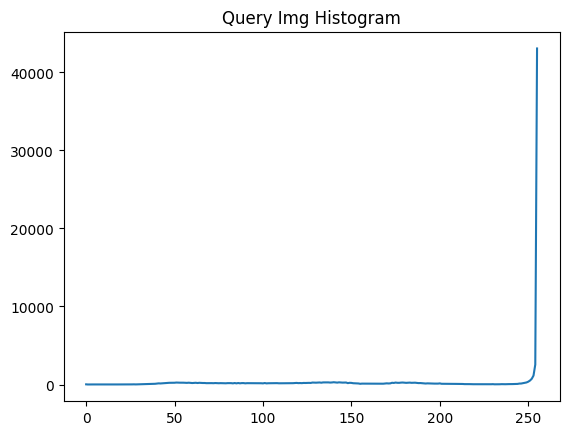

'From the hitograms plots we can already conclude that \nref image 1 is more similar to query image than ref image 2'

In [65]:
# displaying the reference image 1 histogram
plt.plot(histogram1)
plt.title("Ref Img-1 Histogram")
plt.show()

# displaying the reference image 1 histogram
plt.plot(histogram3)
plt.title("Ref Img-2 Histogram")
plt.show()

# displaying the reference image 1 histogram
plt.plot(histogram2)
plt.title("Query Img Histogram")
plt.show()

'''From the hitograms plots we can already conclude that 
ref image 1 is more similar to query image than ref image 2'''

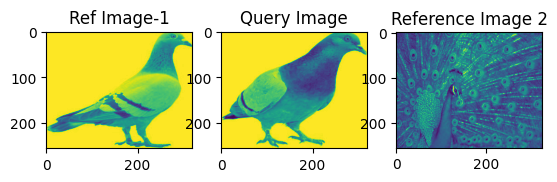

In [66]:
# displaying the images in a single plot
plt.subplot(1,3,1)
plt.imshow(image1)
plt.title("Ref Image-1")
plt.subplot(1,3,2)
plt.imshow(image2)
plt.title("Query Image")
plt.subplot(1,3,3)
plt.imshow(image3)
plt.title("Reference Image 2")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


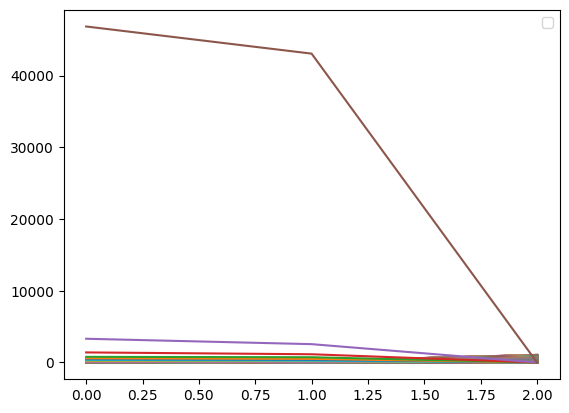

In [67]:
plt.plot([histogram1, histogram2,histogram3])
plt.legend(loc='upper right')
plt.show()

In [68]:

'''
Finding the Euclidian And Bhattacharya Distance
'''
dist_euclidian1= 0
dis1 = []
for i in range(0, len(histogram1)):
    dist_euclidian1 = dist_euclidian1 + math.sqrt(math.pow(histogram1[i]-histogram2[i],2))
    dis1.append((math.sqrt(math.pow(histogram1[i]-histogram2[i],2))))
print(dist_euclidian1)
print(dis1)

dist_euclidian2 = 0
dis2 = []
for i in range(0, len(histogram3)):
    dist_euclidian2 = dist_euclidian2 + math.sqrt(math.pow(histogram3[i]-histogram2[i],2))
    dis2.append((math.sqrt(math.pow(histogram3[i]-histogram2[i],2))))
print(dist_euclidian2)
print(dis2)


    
    
    

24768.0
[21.0, 3.0, 9.0, 5.0, 8.0, 9.0, 13.0, 5.0, 7.0, 8.0, 11.0, 10.0, 6.0, 8.0, 8.0, 13.0, 13.0, 7.0, 7.0, 13.0, 15.0, 7.0, 11.0, 15.0, 9.0, 17.0, 15.0, 21.0, 11.0, 17.0, 22.0, 21.0, 41.0, 43.0, 52.0, 53.0, 66.0, 47.0, 59.0, 78.0, 101.0, 135.0, 121.0, 131.0, 143.0, 164.0, 174.0, 187.0, 188.0, 194.0, 194.0, 225.0, 200.0, 198.0, 207.0, 195.0, 184.0, 181.0, 202.0, 182.0, 156.0, 179.0, 192.0, 164.0, 197.0, 173.0, 171.0, 174.0, 147.0, 150.0, 149.0, 154.0, 147.0, 157.0, 131.0, 130.0, 148.0, 138.0, 108.0, 111.0, 119.0, 117.0, 130.0, 84.0, 128.0, 88.0, 120.0, 96.0, 116.0, 110.0, 85.0, 109.0, 82.0, 95.0, 80.0, 88.0, 69.0, 80.0, 76.0, 77.0, 38.0, 76.0, 51.0, 56.0, 55.0, 53.0, 38.0, 33.0, 61.0, 8.0, 34.0, 19.0, 24.0, 42.0, 17.0, 13.0, 38.0, 35.0, 36.0, 71.0, 30.0, 33.0, 45.0, 66.0, 57.0, 41.0, 68.0, 31.0, 100.0, 61.0, 67.0, 87.0, 90.0, 74.0, 110.0, 59.0, 96.0, 61.0, 55.0, 81.0, 72.0, 57.0, 17.0, 71.0, 26.0, 34.0, 40.0, 74.0, 33.0, 46.0, 2.0, 3.0, 27.0, 1.0, 53.0, 70.0, 51.0, 27.0, 50.0, 60.0, 

In [69]:
#fing the total sum of all values of each histogram 
sum_h1 = np.sum(histogram1)
len_h1 = len(histogram1)
sum_h2 = np.sum(histogram2)
len_h2 = len(histogram2)
sum_h3 = np.sum(histogram3)
len_h3 = len(histogram3)
print(len_h1)
print(sum_h1)
print(len_h2)
print(sum_h2)
print(len_h3)
print(sum_h3)

256
81920
256
81920
256
82944


In [70]:
'''
let us first normalise the given image histograms
'''
for i in range(len(histogram1)):
    histogram1[i] = histogram1[i]/sum_h1
    histogram2[i] = histogram2[i]/sum_h2
    histogram3[i] = histogram3[i]/sum_h3
    
print(histogram1)
print("-----------------------------")
print(histogram2)
print("-----------------------------")
print(histogram3)


    

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.220703125e-05, 1.220703125e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.220703125e-05, 0.0, 0.0, 0.0, 1.220703125e-05, 0.0, 1.220703125e-05, 1.220703125e-05, 1.220703125e-05, 2.44140625e-05, 4.8828125e-05, 7.32421875e-05, 3.662109375e-05, 6.103515625e-05, 2.44140625e-05, 6.103515625e-05, 8.544921875e-05, 0.00013427734375, 0.00015869140625, 0.00013427734375, 0.0001220703125, 0.00015869140625, 0.00025634765625, 0.00032958984375, 0.000341796875, 0.00035400390625, 0.0003662109375, 0.00035400390625, 0.000390625, 0.00037841796875, 0.00030517578125, 0.000439453125, 0.00042724609375, 0.0003173828125, 0.000439453125, 0.0004150390625, 0.000341796875, 0.000341796875, 0.0003173828125, 0.000390625, 0.00037841796875, 0.00035400390625, 0.0003173828125, 0.00025634765625, 0.00032958984375, 0.000244140625, 0.00023193359375, 0.00030517578125, 0.0003173828125, 0.0003173828125, 0.00028076171875, 0.000244140625, 0.0003662109375, 0.00050048828125, 0

In [71]:
#Calculating the Bhattacharyya Distances
ref_img1_dist = bhattacharyya_distance(histogram2,histogram1)
print(f"Bhattacharyya Distance between ref image 1 and query image: {ref_img1_dist}")
ref_img2_dist = bhattacharyya_distance(histogram2,histogram3)
print(f"Bhattacharyya Distance between ref image 2 and query image : {ref_img2_dist}")


'''
As we can see the distance between query image and ref image 1 is less than when compared to the distance
ref image 2 and query image .
Hence we can conclude that ref image 1 is more similar to query image than ref image 2
'''

Bhattacharyya Distance between ref image 1 and query image: 0.03820169552799509
Bhattacharyya Distance between ref image 2 and query image : 0.5407429511337983


'\nAs we can see the distance between query image and ref image 1 is less than when compared to the distance\nref image 2 and query image .\nHence we can conclude that ref image 1 is more similar to query image than ref image 2\n'